# EDA

In [1]:
import pandas as pd
import numpy as np
import pathlib

In [2]:
browsing_train_path = '../data/train/browsing_train.csv'
search_train_path = '../data/train/search_train.csv'
sku_to_content_path = '../data/train/sku_to_content.csv'

In [3]:
browse_df = pd.read_csv(browsing_train_path)

In [4]:
browse_df.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...


In [5]:
browse_df[['event_type', 'product_action']].drop_duplicates()

,event_type,product_action
0,event_product,detail
2,pageview,NaN
713,event_product,add
717,event_product,purchase
2192,event_product,remove


In [6]:
# No search term
search_df = pd.read_csv(search_train_path)

In [7]:
search_df.head()

,session_id_hash,query_vector,clicked_skus_hash,product_skus_hash,server_timestamp_epoch_ms
0,48fade624d47870058ce07dd789ccc04e46c70c0fa2a1b...,"[-0.20255649089813232, -0.016908567398786545, ...",NaN,NaN,1548575194779
1,8731ca84ff7bb8cb647531d54e64feedb2519b4a7792a7...,"[-0.007610442116856575, -0.14909175038337708, ...",NaN,['9ee9ffd7e2529a65f9a0b0c9eaae6330df85cf2e3af3...,1548276763869
2,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.20023074746131897, -0.03151938319206238, 0...",NaN,['7cc72dbed53bab78ec6a62feaa5052a7a1db7d201664...,1548937997295
3,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548938038268
4,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.03269264101982117, -0.27234694361686707, 0...",NaN,['2a0ee2924feabeec35e21e8fcb4d5b0684d190e46cef...,1548938093827


In [8]:
search_df.shape

(819516, 5)

In [9]:
search_df.columns

Index(['session_id_hash', 'query_vector', 'clicked_skus_hash',
       'product_skus_hash', 'server_timestamp_epoch_ms'],
      dtype='object')

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
# search_df = search_df[~search_df['clicked_skus_hash'].isna()][['session_id_hash', 'server_timestamp_epoch_ms']]

In [12]:
df = pd.concat([browse_df, search_df])

In [13]:
df.set_index(['session_id_hash','server_timestamp_epoch_ms'], inplace=True)

In [14]:
df.sort_index(level=(0,1), inplace=True)

In [15]:
df.loc[~df['query_vector'].isna(),'event_type'] = 'search'
df.loc[~df['query_vector'].isna(),'product_action'] = 'search'

In [16]:
df[['event_type', 'product_action']].drop_duplicates()

event_type  \
session_id_hash                                    server_timestamp_epoch_ms                  
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                   pageview   
                                                   1552423391039              event_product   
                                                   1552424389158              event_product   
00000277639fc5c6f816654b78bf3654ece7fd53a7338ff... 1551911424766                     search   
000010504025397b03290c7457e0e7ef7ae93529f21eae3... 1550148902604              event_product   
0000a73bb38c1404dfbe7b7a61ab8417179bddb0a8d2e03... 1552406377448              event_product   

                                                                             product_action  
session_id_hash                                    server_timestamp_epoch_ms                 
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                        NaN  
                                                   1552423391039                     detail  
                                                   1552424389158                        add  
00000277639fc5c6f816654b78bf3654ece7fd53a7338ff... 1551911424766                     search  
000010504025397b03290c7457e0e7ef7ae93529f21eae3... 1550148902604                     remove  
0000a73bb38c1404dfbe7b7a61ab8417179bddb0a8d2e03... 1552406377448                   purchase

In [17]:
df.loc[df['product_action'].isna(), 'product_action'] = 'view'

In [18]:
df[['event_type', 'product_action']].drop_duplicates()

event_type  \
session_id_hash                                    server_timestamp_epoch_ms                  
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                   pageview   
                                                   1552423391039              event_product   
                                                   1552424389158              event_product   
00000277639fc5c6f816654b78bf3654ece7fd53a7338ff... 1551911424766                     search   
000010504025397b03290c7457e0e7ef7ae93529f21eae3... 1550148902604              event_product   
0000a73bb38c1404dfbe7b7a61ab8417179bddb0a8d2e03... 1552406377448              event_product   

                                                                             product_action  
session_id_hash                                    server_timestamp_epoch_ms                 
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                       view  
                                                   1552423391039                     detail  
                                                   1552424389158                        add  
00000277639fc5c6f816654b78bf3654ece7fd53a7338ff... 1551911424766                     search  
000010504025397b03290c7457e0e7ef7ae93529f21eae3... 1550148902604                     remove  
0000a73bb38c1404dfbe7b7a61ab8417179bddb0a8d2e03... 1552406377448                   purchase

## Initial Data Analysis

In [19]:
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of sessions: {df.index.get_level_values(0).nunique()}')

Total number of rows: 36898823
Total number of sessions: 5010682


In [20]:
conversions = pd.get_dummies(df['product_action'])['purchase'].groupby('session_id_hash').sum()

In [21]:
df = df.join(conversions)

In [22]:
df['purchase'] = df['purchase'].where(df['purchase'] < 1, 1)

In [23]:
abandonments = pd.get_dummies(df['product_action'])['add'].groupby('session_id_hash').sum()

In [24]:
abandonments = abandonments.where(abandonments < 1, 1)

In [25]:
df = df.join(abandonments)

In [26]:
df.loc[(df['purchase'] == 0) & (df['add'] == 1), 'purchase'] = 2

In [27]:
df['purchase'].value_counts()

0    30521621
2     4549357
1     1827845
Name: purchase, dtype: int64

In [28]:
status_codes_rev = {
    100:'add',
    200:'detail',
    300:'view',
    400:'search',
    500:'remove'
}

status_codes = {v:k for k,v in status_codes_rev.items()}

df['status'] = df['product_action'].map(status_codes)

In [29]:
df.to_parquet('joined_df.parquet')

In [30]:
# Remove sessions with less than 5 interactions
session_clicks = df['product_action'].groupby(df.index.get_level_values(0)).count()
valid_session_ids = session_clicks[(session_clicks >= 5) & (session_clicks < 200)].index.values

In [31]:
print(f'Sessions before trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')
df = df[df.index.get_level_values(0).isin(valid_session_ids)]
print(f'Sessions after trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')

Sessions before trimming based on session length: 5010682
Sessions after trimming based on session length: 1923272


In [32]:
total_count = df.index.get_level_values(0).unique().shape[0]
converted_count = df[df['purchase'] == 1].index.get_level_values(0).unique().shape[0]
unconverted_count = df[df['purchase'] == 0].index.get_level_values(0).unique().shape[0]
abandonment_count = df[df['purchase'] == 2].index.get_level_values(0).unique().shape[0]
print('Number of converted sessions')
print(converted_count)
print('Number of unconverted sessions')
print(unconverted_count)
print('Number of abandoned sessions')
print(abandonment_count)
print(f'Percentage of total session converted: {(converted_count/total_count*100):.2f}%')
print(f'Percentage of total session abandoned: {(abandonment_count/total_count*100):.2f}%')

Number of converted sessions
50029
Number of unconverted sessions
1718113
Number of abandoned sessions
155130
Percentage of total session converted: 2.60%
Percentage of total session abandoned: 8.07%


## Probability of conversion depending on the presence of a particular action

In [33]:
status_codes = ['view', 'detail', 'add', 'search', 'remove', 'purchase']

# Calculate proportion of converted sessions which contained each status code
conversion_status_counts = df[df['purchase'] == 1]['product_action'].groupby('session_id_hash').value_counts()
conversion_status_counts.iloc[:] = 1

conversion_dict = {code:{} for code in status_codes}
for code in status_codes:
    conversion_dict[code]['count'] = (conversion_status_counts.index.get_level_values(1) == code).sum()
    conversion_dict[code]['prob'] = conversion_dict[code]['count']/converted_count


# Calculate the proportion of unconverted sessions which contained each status code
unconv_status_counts = df[df['purchase'] == 0]['product_action'].groupby('session_id_hash').value_counts()
unconv_status_counts.iloc[:] = 1

unconverted_dict = {code:{} for code in status_codes}
for code in status_codes:
    unconverted_dict[code]['count'] = (unconv_status_counts.index.get_level_values(1) == code).sum()
    unconverted_dict[code]['prob'] = unconverted_dict[code]['count']/unconverted_count
    

    # Calculate proportion of converted sessions which contained each status code
abandonment_status_counts = df[df['purchase'] == 2]['product_action'].groupby('session_id_hash').value_counts()
abandonment_status_counts.iloc[:] = 1

abandonment_dict = {code:{} for code in status_codes}
for code in status_codes:
    abandonment_dict[code]['count'] = (abandonment_status_counts.index.get_level_values(1) == code).sum()
    abandonment_dict[code]['prob'] = abandonment_dict[code]['count']/abandonment_count


In [34]:
# Convert each of the above dictonarys to pandas dataframes and a jopin together
conv_df = pd.DataFrame(conversion_dict).T.rename(
    columns={'count':'converted_count', 'prob':'converted_prob'}
)
unconv_df = pd.DataFrame(unconverted_dict).T.rename(
    columns={'count':'unconverted_count', 'prob':'unconverted_prob'}
)
aband_df = pd.DataFrame(abandonment_dict).T.rename(
    columns={'count':'abandonment_count', 'prob':'abandonment_prob'}
)

conv_probs = conv_df.join(unconv_df).join(aband_df)

In [35]:
conv_probs

,converted_count,converted_prob,unconverted_count,unconverted_prob,abandonment_count,abandonment_prob
view,50029.00,1.00,1718073.00,1.00,154993.00,1.00
detail,44149.00,0.88,1430466.00,0.83,147836.00,0.95
add,46064.00,0.92,0.00,0.00,155130.00,1.00
search,16857.00,0.34,329662.00,0.19,41093.00,0.26
remove,14677.00,0.29,4473.00,0.00,37441.00,0.24
purchase,50029.00,1.00,0.00,0.00,0.00,0.00


In [36]:
conv_probs['n_conversion'] = converted_count
conv_probs['n_non_conversion'] = unconverted_count
conv_probs['n_total'] = df.index.get_level_values(0).unique().shape[0]

In [37]:
conv_probs

,converted_count,converted_prob,unconverted_count,unconverted_prob,abandonment_count,abandonment_prob,n_conversion,n_non_conversion,n_total
view,50029.00,1.00,1718073.00,1.00,154993.00,1.00,50029,1718113,1923272
detail,44149.00,0.88,1430466.00,0.83,147836.00,0.95,50029,1718113,1923272
add,46064.00,0.92,0.00,0.00,155130.00,1.00,50029,1718113,1923272
search,16857.00,0.34,329662.00,0.19,41093.00,0.26,50029,1718113,1923272
remove,14677.00,0.29,4473.00,0.00,37441.00,0.24,50029,1718113,1923272
purchase,50029.00,1.00,0.00,0.00,0.00,0.00,50029,1718113,1923272


In [38]:
conv_probs['converted_std_err'] = np.sqrt(
    conv_probs['converted_prob']*(1-conv_probs['converted_prob'])/conv_probs['n_total']
)

conv_probs['unconverted_std_err'] = np.sqrt(
    conv_probs['unconverted_prob']*(1-conv_probs['unconverted_prob'])/conv_probs['n_total']
)

conv_probs['abandonment_std_err'] = np.sqrt(
    conv_probs['abandonment_prob']*(1-conv_probs['abandonment_prob'])/conv_probs['n_total']
)

conv_probs['converted_std_dev'] = np.sqrt(
    conv_probs['converted_prob']*(1-conv_probs['converted_prob'])
)

conv_probs['unconverted_std_dev'] = np.sqrt(
    conv_probs['unconverted_prob']*(1-conv_probs['unconverted_prob'])
)

conv_probs['abandonment_std_dev'] = np.sqrt(
    conv_probs['abandonment_prob']*(1-conv_probs['abandonment_prob'])
)

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Click Symbols')

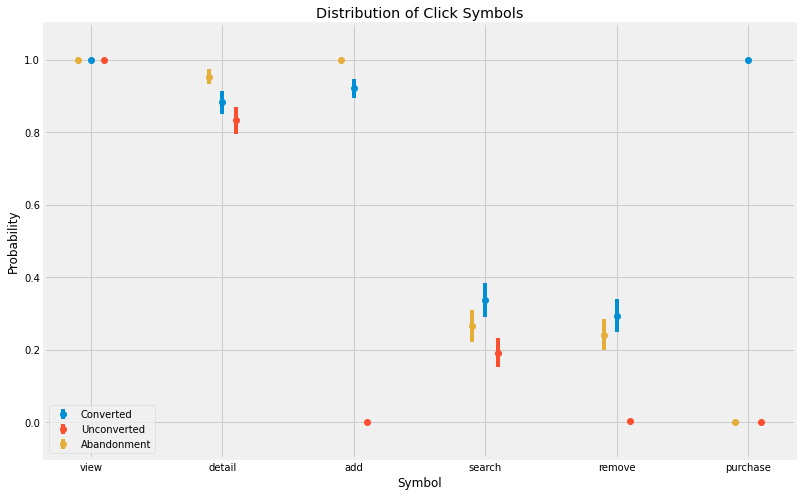

In [40]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylim(-0.1,1.1)
conv_plot = ax.errorbar(conv_probs.index, conv_probs['converted_prob'], yerr=conv_probs['converted_std_dev']*0.1, marker='o', linestyle='')
unconv_plot = ax.errorbar([x+0.1 for x in range(6)], conv_probs['unconverted_prob'], yerr=conv_probs['unconverted_std_dev']*0.1, marker='o', linestyle='')
aban_plot = ax.errorbar([x-0.1 for x in range(6)], conv_probs['abandonment_prob'], yerr=conv_probs['abandonment_std_dev']*0.1, marker='o', linestyle='')
ax.legend(handles=[conv_plot, unconv_plot, aban_plot], labels=['Converted','Unconverted','Abandonment'])
ax.set_xlabel('Symbol')
ax.set_ylabel('Probability')
ax.set_title('Distribution of Click Symbols')

## Normalized Frequencies of each status code for converted and unconverted sessions

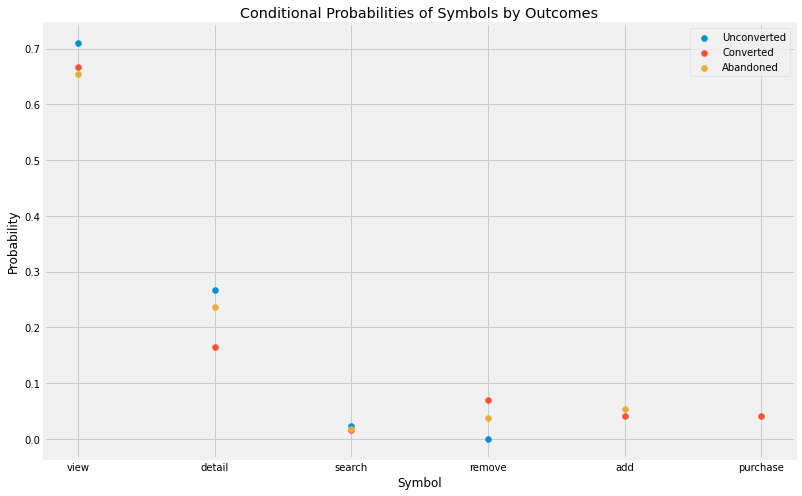

In [42]:
a = df[df['purchase'] == 0]['product_action'].value_counts()/df[df['purchase'] == 0]['product_action'].shape[0]
b = df[df['purchase'] == 1]['product_action'].value_counts()/df[df['purchase'] == 1]['product_action'].shape[0]
c = df[df['purchase'] == 2]['product_action'].value_counts()/df[df['purchase'] == 2]['product_action'].shape[0]


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(a.index, a.values, label='Unconverted')
ax.scatter(b.index, b.values, label='Converted')
ax.scatter(c.index, c.values, label='Abandoned')
ax.set_title('Conditional Probabilities of Symbols by Outcomes')
ax.set_ylabel('Probability')
ax.set_xlabel('Symbol')
ax.legend()

In [43]:
# Counts for converted sessions
count_code_per_session = df[df['purchase'] == 1].groupby(['session_id_hash','product_action']).count()
total_code_per_session = count_code_per_session.groupby('session_id_hash')['purchase'].sum()

count_code_per_session = count_code_per_session.join(total_code_per_session, rsuffix='_total')
count_code_per_session['rel_freq'] = count_code_per_session['purchase']/count_code_per_session['purchase_total']

# Counts for unconverted sessions
count_code_per_session_un = df[df['purchase'] == 0].groupby(['session_id_hash','product_action']).count()
total_code_per_session_un = count_code_per_session_un.groupby('session_id_hash')['purchase'].sum()

count_code_per_session_un = count_code_per_session_un.join(total_code_per_session_un, rsuffix='_total')
count_code_per_session_un['rel_freq'] = count_code_per_session_un['purchase']/count_code_per_session_un['purchase_total']

# Counts for abandoned sessions
count_code_per_session_ab = df[df['purchase'] == 2].groupby(['session_id_hash','product_action']).count()
total_code_per_session_ab = count_code_per_session_ab.groupby('session_id_hash')['purchase'].sum()

count_code_per_session_ab = count_code_per_session_ab.join(total_code_per_session_ab, rsuffix='_total')
count_code_per_session_ab['rel_freq'] = count_code_per_session_ab['purchase']/count_code_per_session_ab['purchase_total']

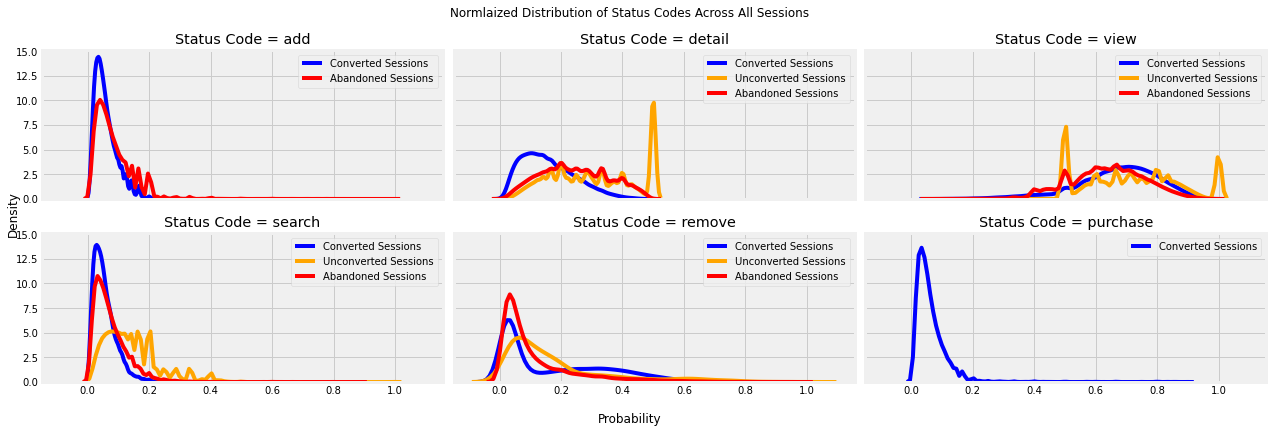

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(18,6), nrows=2, ncols=3, sharex=True, sharey=True)
i = 0

for code, ax in zip(['add','detail','view', 'search', 'remove', 'purchase'], axes.flatten()):
    sns.kdeplot(
        count_code_per_session.loc[count_code_per_session.index.get_level_values(1) == code]['rel_freq'], 
        ax=ax, color='blue', label='Converted Sessions'
    )
    sns.kdeplot(
        count_code_per_session_un.loc[count_code_per_session_un.index.get_level_values(1) == code]['rel_freq'], 
        ax=ax, color='orange', label='Unconverted Sessions'
    )
    sns.kdeplot(
        count_code_per_session_ab.loc[count_code_per_session_ab.index.get_level_values(1) == code]['rel_freq'], 
        ax=ax, color='red', label='Abandoned Sessions'
    )
    if i == 1:
        ax.legend()
    ax.set_title(f'Status Code = {code}')
    i+=1
    
fig.supxlabel('Probability')
fig.supylabel('Density')
fig.suptitle('Normlaized Distribution of Status Codes Across All Sessions')
fig.tight_layout()

In [48]:
count_code_per_session_un.loc[count_code_per_session_un.index.get_level_values(1) == 'detail']['rel_freq']

session_id_hash                                                   product_action
0000162d1dad0beb867c191ab2c8c7c06086cc57d9ebe2eca2798bd76595bb84  detail           0.29
000024f4f0071f59b3fde8d0bdf2517a3767f29ef25a90d9fc17b6b2d98ef167  detail           0.20
0000325be18cb5dc6408c2f38bf8af3f500eba3f92aeb1974b755dac1563129c  detail           0.18
000046143a02246cee440b8682e410eb5c4568a364f3337495299f83b3d74518  detail           0.40
0000481159d514ba59c3ccfa77c5767c9d14ac14e99232ce13ce19b56e58179a  detail           0.37
                                                                                   ... 
ffffead395caef718cd83456cb9fbb01ce4d6d8e76653c237eea36e38501241a  detail           0.33
ffffeb79678f64df5e917423a936e67d6c79bd83a85c826f725af0ede0f3a0b7  detail           0.27
ffffec0d60277e1ff859623244115db6f3fcfbeaf56304550e0405fdca35e032  detail           0.50
fffff2183ad2daa1db3bc4cd320e7248b2f5a6ef9709c412fdde8a9365be63be  detail           0.14
fffffc128ba14ec4d4b2a230b4352453843b3bb

## Creating rules for horizontal visibility graph motifs

In the paper, there were 4 status codes being used in clickstream analysis. View, Add, Remove and Change of Details. The logic for the rules:
![](hvg_motifs.png)  

We can create a function to return True or False if a motif meets the given set of rules. These can be part of a larger function that returns a label for a motif.

We first need to map our `product_actions` to numeric values to be able to create HVGs

In [49]:
status_codes_rev = {
    100:'add',
    200:'detail',
    300:'view',
    400:'search',
    500:'remove'
}

status_codes = {v:k for k,v in status_codes_rev.items()}

df['status'] = df['product_action'].map(status_codes)

In [50]:
def is_z1(m):
    x = (m[1] >= m[0]) & (m[2] < m[1]) & (m[3] <= m[2])
    y = (m[1] >= m[0]) & (m[2] >= m[1])
    z = (m[1] < m[0]) & (m[2] <= m[1]) & (m[3] <= m[2])
    if x or y or z:
        return True
    else:
        return False

In [51]:
def is_z2(m):
    if (m[1] < m[0]) & (m[2] == m[1]) & (m[3] > m[2]):
        return True
    else:
        return False

In [52]:
def is_z3(m):
    x = (m[1] < m[2] < m[0]) & (m[3] <= m[2])
    y = (m[1] < m[0]) & (m[2] >= m[0])
    if x or y:
        return True
    else:
        return False

In [53]:
def is_z4(m):
    x = (m[1] >= m[0]) & (m[2] < m[1]) & (m[3] > m[2])
    y = (m[1] < m[0]) & (m[2] < m[1]) & (m[2] < m[3] <= m[1])
    
    if x or y:
        return True
    else:
        return False

In [54]:
def is_z5(m):
    if (m[1] < m[0]) & (m[1] < m[2] < m[0]) & (m[3] > m[2]):
        return True
    else:
        return False

In [55]:
def is_z6(m):
    if (m[1] < m[0]) & (m[2] < m[1]) & (m[3] > m[1]):
        return True
    else:
        return False

In [56]:
def extract_motif(trajectory):
    if is_z1(trajectory):
        return 0
    if is_z2(trajectory):
        return 1
    if is_z3(trajectory):
        return 2
    if is_z4(trajectory):
        return 3
    if is_z5(trajectory):
        return 4
    if is_z6(trajectory):
        return 5
#     else:
#         return np.nan

## Trajectory Length - Is session trajectory length associated with conversions?

Text(0.5, 0.98, 'Trajectory Length Distribution')

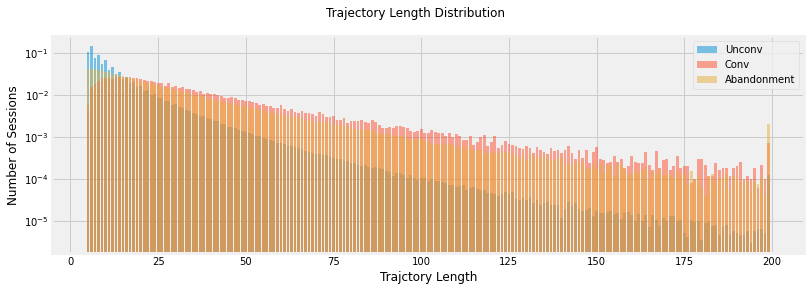

In [57]:
unconv_trajectories = df[df['purchase'] == 0].groupby(['session_id_hash']).count()['product_action'].value_counts()
conv_trajectories = df[df['purchase'] == 1].groupby(['session_id_hash']).count()['product_action'].value_counts()
aban_trajectories = df[df['purchase'] == 2].groupby(['session_id_hash']).count()['product_action'].value_counts()

fig, ax = plt.subplots(figsize=(12,4))

ax.bar(unconv_trajectories.index, unconv_trajectories/unconv_trajectories.sum(), alpha=0.5, label='Unconv')
ax.bar(conv_trajectories.index, conv_trajectories/conv_trajectories.sum(), alpha=0.5, label='Conv')
ax.bar(aban_trajectories.index, aban_trajectories/aban_trajectories.sum(), alpha=0.5, label='Abandonment')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Trajctory Length')
ax.set_ylabel('Number of Sessions')
fig.suptitle('Trajectory Length Distribution')

Very similar distrubutions. The main difference is a slightly smallwer probability of shorter sessions for converted sessions compared to unconvereted

### Calculating relative frequency of 1-gram, 2-gram, HVGm and entropy for each session

In [26]:
def extract_features(traj, add_label=False, label=0, trim=False, trim_length=None):
    
    if trim:
        traj = traj[:trim_length]

    one_grams_idx = {
        100:0,
        200:1,
        300:2,
        400:3,
        500:4
    }
    
    length = len(traj)
    one_grams = np.zeros(5)
    # Extract 1 grams
    for x in traj:
        if x in [100,200,300,400,500]:
            one_grams[one_grams_idx[x]] += 1
    # Normalize to probilities
    one_grams /= length
    
    # Create empty matrix for 2-grams
    two_grams = np.zeros([5,5])
    # Extract 2 grams and normalize with length - 1 or sum of all values
    for x, y in zip(traj[:-1], traj[1:]):
        if x in [100,200,300,400,500] and y in [100,200,300,400,500]:
            two_grams[one_grams_idx[x], one_grams_idx[y]] += 1
    
    two_grams /= two_grams.sum()
    
    # Extract HVG motif counts and normalize
    hvg = np.zeros(6)
    for i in range(length):
        if i <= (length - 4):
            motif = extract_motif(traj[i:i+4])
            hvg[motif] += 1
        else:
            break
    
    hvg /= hvg.sum()
    
    entropy = -np.sum(hvg * np.where(hvg == 0, 0, np.log(hvg)))
    
    if not add_label:
        return np.r_[one_grams, two_grams.ravel(), hvg, entropy]
    else:
        return np.r_[one_grams, two_grams.ravel(), hvg, entropy, label]
    
    
    

In [54]:
extract_motif([100, 200, 100, 300])

3

In [55]:
test = [100, 200, 600, 300, 400, 200, 200, 500, 200, 400]

features = extract_features(test)
features

/home/grantbeasley/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


array([0.1       , 0.4       , 0.1       , 0.2       , 0.1       ,
       0.        , 0.14285714, 0.        , 0.        , 0.        ,
       0.        , 0.14285714, 0.        , 0.14285714, 0.14285714,
       0.        , 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.14285714, 0.        , 0.        , 0.        ,
       0.        , 0.14285714, 0.        , 0.        , 0.        ,
       0.42857143, 0.14285714, 0.14285714, 0.28571429, 0.        ,
       0.        , 1.27703426])

In [56]:
features.shape

(37,)

In [57]:
import gc

for obj in gc.get_objects():
    if isinstance(obj, pd.DataFrame):
        print(obj.shape)


(36079307, 6)
(5, 6)
(5, 2)
(819516, 5)
(5, 5)
(6, 2)
(6, 2)
(30444672, 10)
(6, 2)
(6, 2)
(6, 2)
(6, 15)
(221805, 10)
(3482674, 10)
(536493, 10)


### Assessing feature importances
We need to look at two aspects when training a simple XGBoost model on this imbalanced dataset:
1. Creating more balanced subsets for training
2. Cross validation

For 1. we will use imbalanced-learn (as opposed to modifying thresholds as we've done previously for binary classification tasks) and for 2. we will use sklearn's package KFold. First we need to get all of the data points into a format of (features, label)

In [58]:
import datetime

In [59]:
## Attempting the above using distributed framework Dask
from dask.distributed import Client
client = Client()

In [60]:
client

Client Scheduler: tcp://127.0.0.1:46387 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 16.42 GB


In [61]:
dash_df = df.loc[:,['status', 'purchase']].copy(deep=True)

In [62]:
dash_df.shape

(30444672, 2)

In [63]:
# Get rid of unused dataframe so no OOM errors

# import gc

# for obj in gc.get_objects():
#     if isinstance(obj, pd.DataFrame):
#         if obj.shape != dash_df.shape:
#             del(obj)

In [64]:
del(browse_df)
del(search_df)
del(df)
del(conversions)
del(session_clicks)
del(valid_session_ids)
del(converted_count)
del(unconverted_count)
del(conversion_status_counts)
del(conv_df)
del(unconv_df)
del(conv_probs)
del(a)
del(b)
del(count_code_per_session_un)
del(count_code_per_session)

In [65]:
for obj in gc.get_objects():
    if isinstance(obj, pd.DataFrame):
        print(obj.shape)

(30444672, 2)
(5, 6)
(5, 2)
(5, 5)
(6, 2)
(6, 2)
(6, 2)
(6, 15)
(536493, 10)


In [66]:
import dask.dataframe as dd
dd1 = dd.from_pandas(dash_df[dash_df['purchase'] == 1].reset_index(1), npartitions=8)
dd2 = dd.from_pandas(dash_df[dash_df['purchase'] == 0].reset_index(1), npartitions=8)
dd3 = dd.from_pandas(dash_df[dash_df['purchase'] == 2].reset_index(1), npartitions=8)

In [67]:
dd1.head()

,server_timestamp_epoch_ms,status,purchase
session_id_hash,,,
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1550494322923,300.00,1
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1550494355728,400.00,1
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1550494357775,300.00,1
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1550494367667,300.00,1
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1550494385290,300.00,1


In [68]:
print(datetime.datetime.now().strftime('%H:%M:%S'))
dask_converted_features = dd1.groupby(['session_id_hash'])['status'].apply(extract_features, add_label=True, label=1)
dask_unconverted_features = dd2.groupby(['session_id_hash'])['status'].apply(extract_features, add_label=True, label=0)
dask_abandoned_features = dd3.groupby(['session_id_hash'])['status'].apply(extract_features, add_label=True, label=2)
print(datetime.datetime.now().strftime('%H:%M:%S'))

11:54:53
11:54:53


/home/grantbeasley/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  
/home/grantbeasley/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  This is separate from the ipykernel package so we can avoid doing imports until
/home/grantbeasley/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpec

In [69]:
print(datetime.datetime.now().strftime('%H:%M:%S'))
converted_features = dask_converted_features.compute()
print(datetime.datetime.now().strftime('%H:%M:%S'))
unconverted_features = dask_unconverted_features.compute()
print(datetime.datetime.now().strftime('%H:%M:%S'))
abandoned_features = dask_abandoned_features.compute()
print(datetime.datetime.now().strftime('%H:%M:%S'))

11:54:53
11:55:48
12:09:40
12:12:24


In [70]:
data1 = np.vstack(converted_features)
data2 = np.vstack(unconverted_features)
data3 = np.vstack(abandoned_features)

In [71]:
data = np.concatenate([data1, data2, data3])

In [72]:
with open('processed_features.npy', 'wb') as f:
    np.save(f, data)

## Classifier

In [86]:
!conda install -c conda-forge imbalanced-learn --yes

Solving environment: done

# All requested packages already installed.



In [76]:
np.bincount(data[:,-1].astype(int))

array([1718113,   50029,  155130])

In [58]:
data = np.load('processed_features.npy')

In [59]:
import imblearn as imbl
import matplotlib.pyplot as plt

In [60]:
X, y = data[:,:-1], data[:,-1].reshape(-1,1)

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)


In [62]:
#X_resampled.shape, y_resampled.shape, 
X_undersampled.shape, y_undersampled.shape

((112020, 37), (112020,))

In [63]:
# Reshuffling undersampled datasets
n = X_undersampled.shape[0]

new_idx = np.random.permutation(np.arange(n))
X_undersampled = X_undersampled[new_idx]
y_undersampled = y_undersampled[new_idx]

In [64]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,4], 'booster':['gbtree', 'gblinear', 'dart']}
bst = XGBClassifier()
clf = GridSearchCV(bst, parameters)
clf.fit(X_undersampled, y_undersampled)

[08:48:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:16] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find abov

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [65]:
best_clf = XGBClassifier(parameters=clf.best_params_)

In [66]:
best_clf.fit(X_undersampled, y_undersampled)

[08:54:27] WARNING: /workspace/src/learner.cc:480: 
Parameters: { parameters } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob',
              parameters={'booster': 'gbtree', 'max_depth': 4}, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
grid_search_results = pd.DataFrame(clf.cv_results_)

In [68]:
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.32,2.11,0.05,0.00,gbtree,2,"{'booster': 'gbtree', 'max_depth': 2}",0.97,0.97,0.97,0.97,0.97,0.97,0.00,5
1,12.51,0.69,0.06,0.00,gbtree,3,"{'booster': 'gbtree', 'max_depth': 3}",0.98,0.98,0.98,0.98,0.98,0.98,0.00,3
2,17.30,1.24,0.08,0.01,gbtree,4,"{'booster': 'gbtree', 'max_depth': 4}",0.99,0.99,0.99,0.99,0.99,0.99,0.00,1
3,2.72,0.07,0.02,0.00,gblinear,2,"{'booster': 'gblinear', 'max_depth': 2}",0.95,0.94,0.94,0.94,0.95,0.95,0.00,9
4,2.94,0.07,0.03,0.00,gblinear,3,"{'booster': 'gblinear', 'max_depth': 3}",0.95,0.95,0.94,0.94,0.95,0.95,0.00,8
5,2.74,0.10,0.02,0.00,gblinear,4,"{'booster': 'gblinear', 'max_depth': 4}",0.95,0.95,0.95,0.94,0.95,0.95,0.00,7
6,18.17,4.18,0.08,0.02,dart,2,"{'booster': 'dart', 'max_depth': 2}",0.97,0.97,0.97,0.97,0.97,0.97,0.00,5
7,18.85,0.68,0.07,0.01,dart,3,"{'booster': 'dart', 'max_depth': 3}",0.98,0.98,0.98,0.98,0.98,0.98,0.00,3
8,24.88,0.69,0.08,0.01,dart,4,"{'booster': 'dart', 'max_depth': 4}",0.99,0.99,0.99,0.99,0.99,0.99,0.00,1


In [69]:
np.sum(best_clf.predict(X_test) == y_test.flatten()) / X_test.shape[0]

0.999224238693227

Text(0, 0.5, 'Importance (AU)')

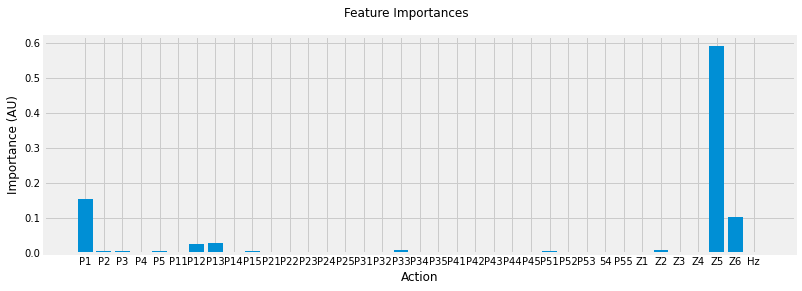

In [71]:
best_clf.feature_importances_
columns = ['P1', 'P2','P3', 'P4', 'P5', 
           'P11', 'P12', 'P13', 'P14', 'P15',
           'P21', 'P22', 'P23', 'P24', 'P25', 
           'P31', 'P32', 'P33', 'P34', 'P35',
           'P41', 'P42', 'P43', 'P44', 'P45',
           'P51', 'P52', 'P53', '54', 'P55',
           'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Hz']

plt.figure(figsize=(12,4))
plt.bar(columns, best_clf.feature_importances_)
plt.suptitle('Feature Importances')
plt.xlabel('Action')
plt.ylabel('Importance (AU)')

In [79]:
# Calculating F1 and AUC score

from sklearn.metrics import roc_auc_score, f1_score

def calc_f1_auc_scores(model, X_test_data, y_test_data):
    
    auc = roc_auc_score(model.predict(X_test_data), y_test_data, multi_class='ovr')
    f1 = f1_score(model.predict(X_test_data), y_test_data)
    
    return auc, f1
    
    

In [80]:
calc_f1_auc_scores(best_clf, X_test, y_test)

ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

## Testing Other Methods
1. Logistic Regression
2. Random Forest
3. SVC
4. XGBoost
5. NN

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_undersampled, y_undersampled)
calc_f1_auc_scores(lr, X_test, y_test)

/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(0.6834708358038643, 0.5302161729383507)

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()
svc.fit(X_undersampled, y_undersampled)
calc_f1_auc_scores(svc, X_test, y_test)

KeyboardInterrupt: 

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_undersampled, y_undersampled)
calc_f1_auc_scores(rf, X_test, y_test)

(0.686296232417453, 0.5416481069042317)

In [132]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100,100)).fit(X_undersampled, y_undersampled)
calc_f1_auc_scores(nn, X_test, y_test)

(0.9902235201287007, 0.9895112955278931)

In [2]:
## Running 10 Subsamples of the data
import numpy as np

data = np.load('processed_features.npy')

X, y = data[:,:-1], data[:,-1].reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train, y_test = y_train.astype(int), y_test.astype(int)
y_ohe = np.zeros(shape=[y_test.shape[0],3])
y_ohe[np.arange(y_ohe.shape[0]), y_test.flatten()] = 1

_,na,_ = np.where([np.isnan(X_test)])
X_test = np.delete(X_test, na, axis=0)
y_test = np.delete(y_test, na, axis=0)
y_ohe = np.delete(y_ohe, na, axis=0)


from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

classifier_scores = {
    'xgb': {
        'model': XGBClassifier(),
        'f1': [],
        'auc': []
    },
    'lr': {
        'model': LogisticRegression(),
        'f1': [],
        'auc': []
    },
    'rf': {
        'model': RandomForestClassifier(),
        'f1': [],
        'auc': []
    },
    'nn': {
        'model': MLPClassifier(hidden_layer_sizes=(100,100)),
        'f1': [],
        'auc': []
    },
    
}


from sklearn.metrics import roc_auc_score, f1_score

def calc_f1_auc_scores(model, X_test_data, y_test_data, y_test_ohe=None):
    
    auc = roc_auc_score(y_test_ohe, model.predict_proba(X_test_data), multi_class='ovr')
    f1 = f1_score(y_test_data, model.predict(X_test_data), average='macro')
    
    return auc, f1

In [13]:
## Running 10 rounds of each model

import pickle

for i in range(10):
    
    print(i)
    # Random undersample of dataset for balanced data
    rus = RandomUnderSampler()
    X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
    # Shuffle dataset
    n = X_undersampled.shape[0]

    new_idx = np.random.permutation(np.arange(n))
    X_undersampled = X_undersampled[new_idx]
    y_undersampled = y_undersampled[new_idx]
    
    _,na,_ = np.where([np.isnan(X_undersampled)])
    X_undersampled = np.delete(X_undersampled, na, axis=0)
    y_undersampled = np.delete(y_undersampled, na, axis=0)
    
    for clf in classifier_scores.keys():
        print(clf)
        classifier_scores[clf]['model'].fit(X_undersampled, y_undersampled)
        auc, f1 = calc_f1_auc_scores(classifier_scores[clf]['model'], X_test, y_test, y_ohe)
        classifier_scores[clf]['f1'].append(f1)
        classifier_scores[clf]['auc'].append(auc)
        
    with open(f'result_dict_{i}.pkl', 'wb') as f:
        pickle.dump(classifier_scores, f)
        

0
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
1
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
2
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
3
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
4
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
5
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
6
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
7
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
8
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
9
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn


In [17]:
with open('result_dict_9.pkl', 'rb') as f:
    test = pickle.load(f)

In [18]:
test

{'xgb': {'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=1,
                objective='multi:softprob', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=None, subsample=1,
                tree_method='exact', validate_parameters=False, verbosity=None),
  'f1': [0.9938243940221296,
   0.9937070879158417,
   0.9936063971478628,
   0.9938524495847255,
   0.9934420547663744,
   0.9936939576304883,
   0.9938118818090356,
   0.9936276132713889,
   0.9935520541694887,
   0.9934886665974524],
  'auc': [0.9999655769037056,
   0.9999654496833291,
   0.999967662243475,
   0.9999651085469309,

<BarContainer object of 37 artists>

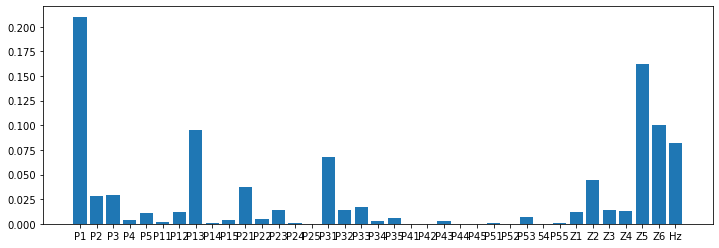

In [7]:
import matplotlib.pyplot as plt
columns = ['P1', 'P2','P3', 'P4', 'P5', 
           'P11', 'P12', 'P13', 'P14', 'P15',
           'P21', 'P22', 'P23', 'P24', 'P25', 
           'P31', 'P32', 'P33', 'P34', 'P35',
           'P41', 'P42', 'P43', 'P44', 'P45',
           'P51', 'P52', 'P53', '54', 'P55',
           'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Hz']

plt.figure(figsize=(12,4))
plt.bar(columns, classifier_scores['rf']['model'].feature_importances_)

In [19]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 569 kB 1.1 MB/s eta 0:00:01


In [16]:
import shap
import pickle
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
with open('result_dict_9.pkl', 'rb') as f:
    classifier_scores = pickle.load(f)

In [23]:
explainer = shap.TreeExplainer(classifier_scores['rf']['model'], approximate=True)
shap_values = explainer.shap_values(X_test[np.random.choice(np.arange(X_test.shape[0]), size=200)])

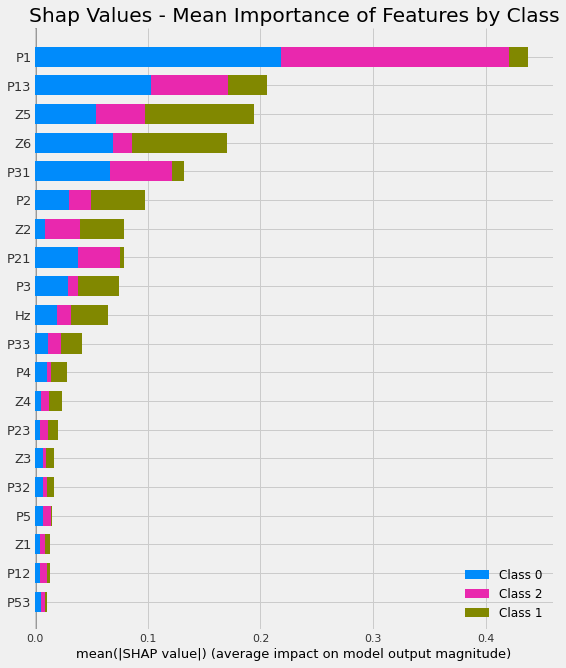

In [21]:
features = ['P1', 'P2','P3', 'P4', 'P5', 
           'P11', 'P12', 'P13', 'P14', 'P15',
           'P21', 'P22', 'P23', 'P24', 'P25', 
           'P31', 'P32', 'P33', 'P34', 'P35',
           'P41', 'P42', 'P43', 'P44', 'P45',
           'P51', 'P52', 'P53', '54', 'P55',
           'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Hz']

plt.title('Shap Values - Mean Importance of Features by Class')
shap.summary_plot(shap_values, X_test[:100000], feature_names=features)


## Early Prediction

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dask.distributed import Client
import dask.dataframe as dd
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, f1_score
import pickle
import datetime


Load data
df = pd.read_parquet('joined_df.parquet')
dash_df = df.loc[:,['status', 'purchase']].copy(deep=True)

del(df)

def extract_features(traj, add_label=False, label=0, trim=False, trim_length=None):
    
    if trim:
        traj = traj[:trim_length]

    one_grams_idx = {
        100:0,
        200:1,
        300:2,
        400:3,
        500:4
    }
    
    length = len(traj)
    one_grams = np.zeros(5)
    # Extract 1 grams
    for x in traj:
        if x in [100,200,300,400,500]:
            one_grams[one_grams_idx[x]] += 1
    # Normalize to probilities
    one_grams /= length
    
    # Create empty matrix for 2-grams
    two_grams = np.zeros([5,5])
    # Extract 2 grams and normalize with length - 1 or sum of all values
    for x, y in zip(traj[:-1], traj[1:]):
        if x in [100,200,300,400,500] and y in [100,200,300,400,500]:
            two_grams[one_grams_idx[x], one_grams_idx[y]] += 1
    
    two_grams /= two_grams.sum()
    
    # Extract HVG motif counts and normalize
    hvg = np.zeros(6)
    for i in range(length):
        if i <= (length - 4):
            motif = extract_motif(traj[i:i+4])
            hvg[motif] += 1
        else:
            break
    
    hvg /= hvg.sum()
    
    entropy = -np.sum(hvg * np.where(hvg == 0, 0, np.log(hvg)))
    
    if not add_label:
        return np.r_[one_grams, two_grams.ravel(), hvg, entropy]
    else:
        return np.r_[one_grams, two_grams.ravel(), hvg, entropy, label]
    
def calc_f1_auc_scores(model, X_test_data, y_test_data, y_test_ohe=None):

    auc = roc_auc_score(y_test_ohe, model.predict_proba(X_test_data), multi_class='ovr')
    f1 = f1_score(y_test_data, model.predict(X_test_data), average='macro')

    return auc, f1

client = Client() 

dd1 = dd.from_pandas(dash_df[dash_df['purchase'] == 1].reset_index(1), npartitions=8)
dd2 = dd.from_pandas(dash_df[dash_df['purchase'] == 0].reset_index(1), npartitions=8)
dd3 = dd.from_pandas(dash_df[dash_df['purchase'] == 2].reset_index(1), npartitions=8)


for i in range(14,15):
    print(datetime.datetime.now().strftime('%H:%M:%S'))
    dask_converted_features = dd1.groupby(['session_id_hash'])['status'].apply(extract_features, add_label=True, label=1, trim=True, trim_length=i)
    dask_unconverted_features = dd2.groupby(['session_id_hash'])['status'].apply(extract_features, add_label=True, label=0, trim=True, trim_length=i)
    dask_abandoned_features = dd3.groupby(['session_id_hash'])['status'].apply(extract_features, add_label=True, label=2, trim=True, trim_length=i)
    print(datetime.datetime.now().strftime('%H:%M:%S'))

    print(datetime.datetime.now().strftime('%H:%M:%S'))
    converted_features = dask_converted_features.compute()
    print(datetime.datetime.now().strftime('%H:%M:%S'))
    unconverted_features = dask_unconverted_features.compute()
    print(datetime.datetime.now().strftime('%H:%M:%S'))
    abandoned_features = dask_abandoned_features.compute()
    print(datetime.datetime.now().strftime('%H:%M:%S'))
    
    data1 = np.vstack(converted_features)
    data2 = np.vstack(unconverted_features)
    data3 = np.vstack(abandoned_features)
    
    data = np.concatenate([data1, data2, data3])
    
    with open(f'processed_features_length_{i}.npy', 'wb') as f:
        np.save(f, data)

    data = np.load('processed_features_length_14.npy')
    X, y = data[:,:-1], data[:,-1].reshape(-1,1)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    y_train, y_test = y_train.astype(int), y_test.astype(int)
    y_ohe = np.zeros(shape=[y_test.shape[0],3])
    y_ohe[np.arange(y_ohe.shape[0]), y_test.flatten()] = 1

    _,na,_ = np.where([np.isnan(X_test)])
    X_test = np.delete(X_test, na, axis=0)
    y_test = np.delete(y_test, na, axis=0)
    y_ohe = np.delete(y_ohe, na, axis=0)


    classifier_scores = {
        'xgb': {
            'model': XGBClassifier(),
            'f1': [],
            'auc': []
        },
        'lr': {
            'model': LogisticRegression(),
            'f1': [],
            'auc': []
        },
        'rf': {
            'model': RandomForestClassifier(),
            'f1': [],
            'auc': []
        },
        'nn': {
            'model': MLPClassifier(hidden_layer_sizes=(100,100)),
            'f1': [],
            'auc': []
        },

    }

    for x in range(4,10):
        print(f'Length: {i}. Loop: {x}')
        # Random undersample of dataset for balanced data
        rus = RandomUnderSampler()
        X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
        # Shuffle dataset
        n = X_undersampled.shape[0]

        new_idx = np.random.permutation(np.arange(n))
        X_undersampled = X_undersampled[new_idx]
        y_undersampled = y_undersampled[new_idx]

        _,na,_ = np.where([np.isnan(X_undersampled)])
        X_undersampled = np.delete(X_undersampled, na, axis=0)
        y_undersampled = np.delete(y_undersampled, na, axis=0)

        for clf in classifier_scores.keys():
            print(clf)
            classifier_scores[clf]['model'].fit(X_undersampled, y_undersampled)
            auc, f1 = calc_f1_auc_scores(classifier_scores[clf]['model'], X_test, y_test, y_ohe)
            classifier_scores[clf]['f1'].append(f1)
            classifier_scores[clf]['auc'].append(auc)

        with open(f'result_dict_{x}_length_{i}.pkl', 'wb') as f:
            pickle.dump(classifier_scores, f)

        print(f'Checkpoint: Length {i} complete')

    

   

Length: 14. Loop: 4
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Checkpoint: Length 14 complete
Length: 14. Loop: 5
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
Checkpoint: Length 14 complete
Length: 14. Loop: 6
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
Checkpoint: Length 14 complete
Length: 14. Loop: 7
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
Checkpoint: Length 14 complete
Length: 14. Loop: 8
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn
Checkpoint: Length 14 complete
Length: 14. Loop: 9
xgb
lr


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rf
nn


/home/grantbeasley/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Checkpoint: Length 14 complete


## Collating the results

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dask.distributed import Client
import dask.dataframe as dd
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, f1_score
import pickle
import datetime

ImportError: Dask's distributed scheduler is not installed.

Please either conda or pip install dask distributed:

  conda install dask distributed          # either conda install
  python -m pip install "dask[distributed]" --upgrade  # or python -m pip install

In [3]:
results = {
    model : {
        'f1': [[] for _ in range(10)],
        'auc':[[] for _ in range(10)],
    }
    for model in ['xgb', 'lr', 'rf', 'nn'] }

In [3]:
results

{'xgb': {'f1': [[], [], [], [], [], [], [], [], [], []],
  'auc': [[], [], [], [], [], [], [], [], [], []]},
 'lr': {'f1': [[], [], [], [], [], [], [], [], [], []],
  'auc': [[], [], [], [], [], [], [], [], [], []]},
 'rf': {'f1': [[], [], [], [], [], [], [], [], [], []],
  'auc': [[], [], [], [], [], [], [], [], [], []]},
 'nn': {'f1': [[], [], [], [], [], [], [], [], [], []],
  'auc': [[], [], [], [], [], [], [], [], [], []]}}

In [6]:
import pickle
import numpy as np
for i in range(5,15):
    for h in range(10):
        with open(f'result_dict_{h}_length_{i}.pkl', 'rb') as f:
            file = pickle.load(f)    
            for model in file.keys():
                f1 = file[model]['f1'][-1]
                auc = file[model]['auc'][-1]
                results[model]['f1'][i-5].append(f1)
                results[model]['auc'][i-5].append(auc)
                

In [7]:
for model in results.keys():
    results[model]['f1_avg'] = []
    results[model]['f1_std'] = []
    results[model]['auc_avg'] = []
    results[model]['auc_std'] = []
    for i in range(10):
        f1_avg = np.mean(results[model]['f1'][i])
        f1_std = np.std(results[model]['f1'][i])
        auc_avg = np.mean(results[model]['auc'][i])
        auc_std = np.std(results[model]['auc'][i])
        results[model]['f1_avg'].append(f1_avg)
        results[model]['f1_std'].append(f1_std)
        results[model]['auc_avg'].append(auc_avg)
        results[model]['auc_std'].append(auc_std)
        

In [10]:
# Plotting the results
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Text(0.5, 0.98, 'Classifier Performance on Limited Length Clickstreams')

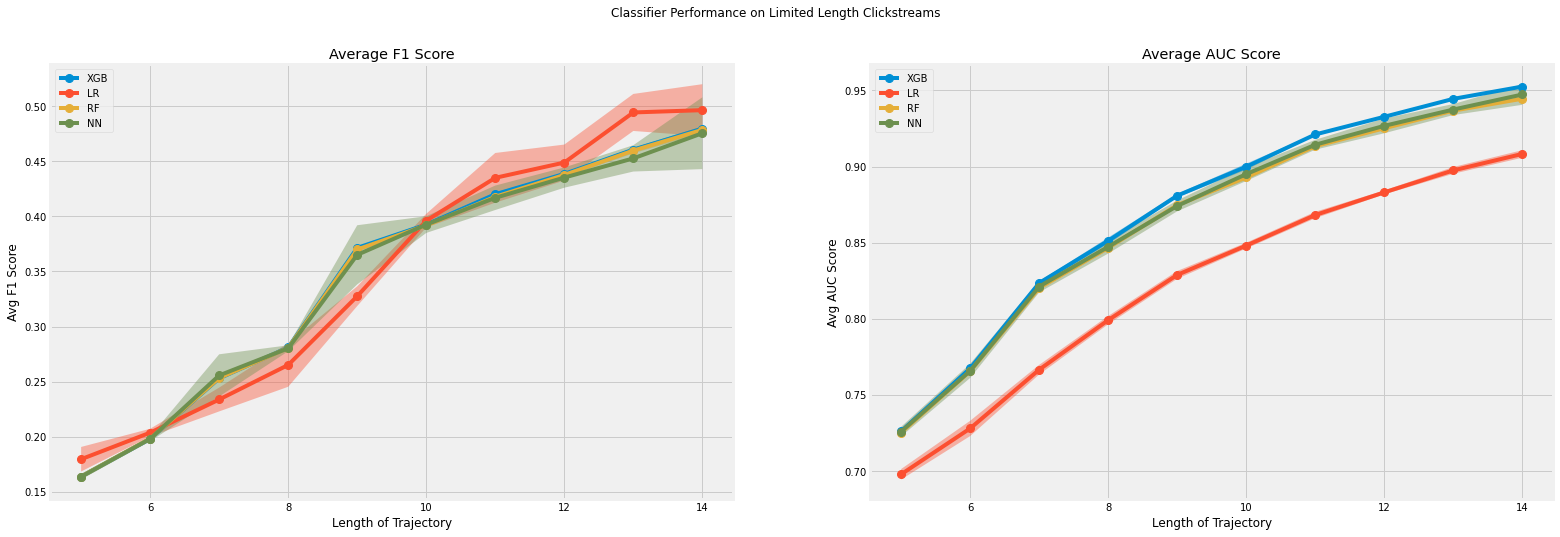

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))

ax1.set_title('Average F1 Score')
ax1.set_ylabel('Avg F1 Score')
ax1.set_xlabel('Length of Trajectory')
ax2.set_ylabel('Avg AUC Score')
ax2.set_title('Average AUC Score')
ax2.set_xlabel('Length of Trajectory')
for model in ('xgb', 'lr', 'rf', 'nn'):
    f1_avg = np.array(results[model]['f1_avg'])
    f1_std = np.array(results[model]['f1_std'])
    auc_avg = np.array(results[model]['auc_avg'])
    auc_std = np.array(results[model]['auc_std'])

    ax1.plot(range(5,15),f1_avg, marker='o', markersize=8, label=model.upper())
    ax1.fill_between(x=range(5,15), y1=(f1_avg - 1.96*f1_std), y2=(f1_avg + 1.96*f1_std), alpha=0.4)
    ax1.legend()
    
    ax2.plot(range(5,15), auc_avg, marker='o', markersize=8, label=model.upper())
    ax2.fill_between(x=range(5,15), y1=(auc_avg - 1.96*auc_std), y2=(auc_avg + 1.96*auc_std), alpha=0.4)
    ax2.legend()

fig.suptitle('Classifier Performance on Limited Length Clickstreams')
    

In [ ]:
## Checklist
* Discriminative network - Full Length
* Discriminative network - partial length
* Generative network - Full Length
* Generative network - Parital lengths

## Creating LSTM Network (Discriminative Network)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  0


In [3]:
df = pd.read_parquet('joined_df.parquet')

In [4]:
df

event_type  \
session_id_hash                                    server_timestamp_epoch_ms                  
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                   pageview   
                                                   1552423391039              event_product   
                                                   1552424389158              event_product   
                                                   1552424395594                   pageview   
                                                   1552424417587                   pageview   
...                                                                                     ...   
fffffc128ba14ec4d4b2a230b4352453843b3bb59becf5d... 1550718613724                   pageview   
                                                   1550718613724              event_product   
                                                   1550718642814              event_product   
                                                   1550718642814                   pageview   
                                                   1550720097505                   pageview   

                                                                             product_action  \
session_id_hash                                    server_timestamp_epoch_ms                  
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                       view   
                                                   1552423391039                     detail   
                                                   1552424389158                        add   
                                                   1552424395594                       view   
                                                   1552424417587                       view   
...                                                                                     ...   
fffffc128ba14ec4d4b2a230b4352453843b3bb59becf5d... 1550718613724                       view   
                                                   1550718613724                     detail   
                                                   1550718642814                     detail   
                                                   1550718642814                       view   
                                                   1550720097505                       view   

                                                                                                               product_sku_hash  \
session_id_hash                                    server_timestamp_epoch_ms                                                      
00000114e1075962f022114fcfc17f2d874e694ac5d2010... 1552423391039                                                           None   
                                                   1552423391039              cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c99feeac...   
                                                   1552424389158              cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c99feeac...   
                                                   1552424395594                                                           None   
                                                   1552424417587                                                           None   
...                                                                                                                         ...   
fffffc128ba14ec4d4b2a230b4352453843b3bb59becf5d... 1550718613724                                                           None   
                                                   1550718613724              bed8a2b601108932cbd8b3b14cde1d4919262c60b35cad...   
                                                   1550718642814              2b1dd7624847cfe832fb6aaba59834f34008ed2820bca3...   
                                                   1550718642814                                                           None   
                                     

In [5]:
# Discrimative classifier - Full length

session_clicks = df['product_action'].groupby(df.index.get_level_values(0)).count()
valid_session_ids = session_clicks[(session_clicks >= 5) & (session_clicks < 200)].index.values
print(f'Sessions before trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')
df = df[df.index.get_level_values(0).isin(valid_session_ids)]
print(f'Sessions after trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')

print(df.shape)
df = df[~df['status'].isna()]
print(df.shape)

df.loc[(df['purchase'] == 0) & (df['add'] == 1), 'purchase'] = 2

df['status'] = df['status'].astype(int)

# Extract the clickstream for each session
converted_clickstreams = df[df['purchase'] == 1].groupby(['session_id_hash'])['status'].apply(lambda x: x.values)
unconverted_clickstreams = df[df['purchase'] == 0].groupby(['session_id_hash'])['status'].apply(lambda x: x.values)
abandoned_clickstreams = df[df['purchase'] == 2].groupby(['session_id_hash'])['status'].apply(lambda x: x.values)



from sklearn.metrics import roc_auc_score, f1_score
    
def calc_f1_auc_scores_nn(model, X_test_data, y_test_data, y_test_ohe=None):

    auc = roc_auc_score(y_test_ohe, model.predict(X_test_data), multi_class='ovr')
    f1 = f1_score(y_test_ohe.argmax(axis=1), model.predict(X_test_data).argmax(axis=1), average='macro')

    return auc, f1


f1_scores = []
auc_scores = []

for i in range(10):

# Random subsets from unconverted and abandoned sessions to match the shape of conversions
    n_converted = converted_clickstreams.shape[0]
    aban_random = np.random.choice(abandoned_clickstreams, n_converted, replace=False)
    unconv_random = np.random.choice(unconverted_clickstreams, n_converted, replace=False)


    padded_conversions = tf.keras.preprocessing.sequence.pad_sequences(
        converted_clickstreams.to_list(),
        padding='pre',
        maxlen=180
    )

    padded_unconversions = tf.keras.preprocessing.sequence.pad_sequences(
        unconv_random,
        padding='pre',
        maxlen=180
    )

    padded_abandonments = tf.keras.preprocessing.sequence.pad_sequences(
        aban_random,
        padding='pre',
        maxlen=180
    )
    
    purchase_labels = np.ones(padded_conversions.shape[0])
    no_purchase_labels = np.zeros(padded_unconversions.shape[0])
    abandonments_labels = np.ones(padded_abandonments.shape[0])*2
    tf_data = np.r_[padded_conversions, padded_unconversions, padded_abandonments]
    labels = np.r_[purchase_labels, no_purchase_labels, abandonments_labels]
    label_vec = np.zeros((labels.shape[0], 3))
    label_vec[np.arange(labels.shape[0]), labels.astype(int)] = 1
    labels = label_vec
    
    tf_data = tf_data[:,:,np.newaxis]
    
    shuffle = np.random.permutation(tf_data.shape[0])
    tf_data = tf_data[shuffle]
    labels = labels[shuffle]

    X_test, y_test = tf_data[int(0.8*tf_data.shape[0]):], labels[int(0.8*tf_data.shape[0]):]
    X_train, X_val, y_train, y_val = train_test_split(tf_data[:int(0.8*tf_data.shape[0])], labels[:int(0.8*tf_data.shape[0])])
    
    model = keras.Sequential(
        [layers.Masking(mask_value=0, input_shape=(180,1)),
         layers.LSTM(64),
         layers.Dense(3, activation='softmax')]
    )

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    model.summary()

    model.fit(
        x=X_train,
        y=y_train,
        batch_size=128,
        validation_data=(X_val, y_val),
        epochs=10
    )
    

    f1, auc = calc_f1_auc_scores_nn(model, X_test, y_test_data=None, y_test_ohe=y_test)

    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f1_scores)
    print(auc_scores)
    


Sessions before trimming based on session length: 5010682
Sessions after trimming based on session length: 1923272
(30444672, 10)
(30370908, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 180, 1)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 17,091
Trainable params: 17,091
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 [==============================] - 92s 130ms/step - loss: 0.8653 - accuracy: 0.6988 - val_loss: 0.7860 - val_accuracy: 0.7633
Epoch 2/10
704/704 [==============================] - 86s 122ms/step - loss: 0.7745 - accura

KeyboardInterrupt: 

In [22]:
print(f1_scores)
print(auc_scores)

[0.8924121487324067, 0.874976040745323, 0.8923148455973884, 0.8840986181094163, 0.8917047167190401, 0.8932150610713844, 0.8841089828937166, 0.8925170023011387, 0.7358784090401391, 0.8960708304815652]
[0.7748548939978641, 0.7493548569590599, 0.7754814709682433, 0.7694873616478312, 0.7797779926200455, 0.7800396445317747, 0.7732545535359551, 0.7858918190367614, 0.5866656484685087, 0.7798792347761156]


In [19]:
f1_scores_discrim = [0.8924121487324067, 0.874976040745323, 0.8923148455973884, 0.8840986181094163, 0.8917047167190401, 0.8932150610713844, 0.8841089828937166, 0.8925170023011387, 0.7358784090401391, 0.8960708304815652]
auc_scores_discrim = [0.7748548939978641, 0.7493548569590599, 0.7754814709682433, 0.7694873616478312, 0.7797779926200455, 0.7800396445317747, 0.7732545535359551, 0.7858918190367614, 0.5866656484685087, 0.7798792347761156]

In [341]:
f1_scores_avg = np.mean(f1_scores_discrim)
print(f1_scores_avg)
f1_scores_std = np.std(f1_scores_discrim)
print(f1_scores_std)

auc_scores_avg = np.mean(auc_scores_discrim)
print(auc_scores_avg)
auc_scores_std = np.std(auc_scores_discrim)
print(auc_scores_std)

0.873729665569152
0.04633474576307203
0.755468747654216
0.057041351374113085


In [18]:
# padded_conversions.shape, padded_unconversions.shape, padded_abandonments.shape
# padded_conversions = padded_conversions[:10000]
# padded_unconversions = padded_unconversions[:10000]
# padded_abandonments = padded_abandonments[:10000]

In [19]:
purchase_labels = np.ones(padded_conversions.shape[0])
no_purchase_labels = np.zeros(padded_unconversions.shape[0])
abandonments_labels = np.ones(padded_abandonments.shape[0])*2
tf_data = np.r_[padded_conversions, padded_unconversions, padded_abandonments]
labels = np.r_[purchase_labels, no_purchase_labels, abandonments_labels]

In [132]:
tf_data.shape, labels.shape

((6337, 180, 7), (6337, 3))

In [22]:
tf_data = tf_data[:,:,np.newaxis]

In [23]:
tf_data.shape

(30000, 180, 1)

In [26]:
shuffle = np.random.permutation(tf_data.shape[0])
tf_data = tf_data[shuffle]
labels = labels[shuffle]

X_test, y_test = tf_data[int(0.8*tf_data.shape[0]):], labels[int(0.8*tf_data.shape[0]):]
X_train, X_val, y_train, y_val = train_test_split(tf_data[:int(0.8*tf_data.shape[0])], labels[:int(0.8*tf_data.shape[0])])

In [28]:
model = keras.Sequential(
    [layers.Masking(mask_value=0, input_shape=(180,1)),
     layers.LSTM(16),
     layers.Dense(3, activation='softmax')]
)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

model.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    validation_data=(X_val, y_val),
    steps_per_epoch=64,
    epochs=20
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 180, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
64/64 [==============================] - 12s 182ms/step - loss: 1.0975 - accuracy: 0.3356 - val_loss: 1.0960 - val_accuracy: 0.3298
Epoch 2/20
64/64 [==============================] - 12s 191ms/step - loss: 1.0932 - accuracy: 0.3386 - val_loss: 1.0810 - val_accuracy: 0.3727
Epoch 3/20
64/64 [==============================] - 14s 213ms/step - loss: 1.0705 - accuracy: 0.

In [62]:
def calc_f1_auc_scores(model, X_test_data, y_test_data, y_test_ohe=None):
    
    y_test_ohe = np.zeros((y_test.shape[0], 3))
    y_test_ohe[np.arange(y_test.shape[0]), y_test.astype(int)] = 1
    auc = roc_auc_score(y_test_ohe, model.predict_proba(X_test_data), multi_class='ovr')
    f1 = f1_score(y_test, model.predict(X_test_data).argmax(axis=1), average='macro')

    return auc, f1

In [63]:
calc_f1_auc_scores(model, X_test, y_test)

(0.8655656815008076, 0.7097837884492256)

In [4]:
# Variable Length Sequences to Discriminative Classifier


from sklearn.metrics import roc_auc_score, f1_score
    
def calc_f1_auc_scores_nn(model, X_test_data, y_test_data, y_test_ohe=None):

    auc = roc_auc_score(y_test_ohe, model.predict(X_test_data), multi_class='ovr')
    f1 = f1_score(y_test_ohe.argmax(axis=1), model.predict(X_test_data).argmax(axis=1), average='macro')

    return auc, f1

session_clicks = df['product_action'].groupby(df.index.get_level_values(0)).count()
valid_session_ids = session_clicks[(session_clicks >= 5) & (session_clicks < 200)].index.values
print(f'Sessions before trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')
df = df[df.index.get_level_values(0).isin(valid_session_ids)]
print(f'Sessions after trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')

print(df.shape)
df = df[~df['status'].isna()]
print(df.shape)

df.loc[(df['purchase'] == 0) & (df['add'] == 1), 'purchase'] = 2

df['status'] = df['status'].astype(int)


f1_scores = []
auc_scores = []

for i in range(5,15):
    # Extract the clickstream for each session
    converted_clickstreams = df[df['purchase'] == 1].groupby(['session_id_hash'])['status'].apply(lambda x: x.values[:i])
    unconverted_clickstreams = df[df['purchase'] == 0].groupby(['session_id_hash'])['status'].apply(lambda x: x.values[:i])
    abandoned_clickstreams = df[df['purchase'] == 2].groupby(['session_id_hash'])['status'].apply(lambda x: x.values[:i])


    # Random subsets from unconverted and abandoned sessions to match the shape of conversions
    n_converted = converted_clickstreams.shape[0]
    aban_random = np.random.choice(abandoned_clickstreams, n_converted, replace=False)
    unconv_random = np.random.choice(unconverted_clickstreams, n_converted, replace=False)


    padded_conversions = tf.keras.preprocessing.sequence.pad_sequences(
        converted_clickstreams.to_list(),
        padding='pre',
        maxlen=180
    )

    padded_unconversions = tf.keras.preprocessing.sequence.pad_sequences(
        unconv_random,
        padding='pre',
        maxlen=180
    )

    padded_abandonments = tf.keras.preprocessing.sequence.pad_sequences(
        aban_random,
        padding='pre',
        maxlen=180
    )

    purchase_labels = np.ones(padded_conversions.shape[0])
    no_purchase_labels = np.zeros(padded_unconversions.shape[0])
    abandonments_labels = np.ones(padded_abandonments.shape[0])*2
    tf_data = np.r_[padded_conversions, padded_unconversions, padded_abandonments]
    labels = np.r_[purchase_labels, no_purchase_labels, abandonments_labels]
    label_vec = np.zeros((labels.shape[0], 3))
    label_vec[np.arange(labels.shape[0]), labels.astype(int)] = 1
    labels = label_vec

    tf_data = tf_data[:,:,np.newaxis]

    shuffle = np.random.permutation(tf_data.shape[0])
    tf_data = tf_data[shuffle]
    labels = labels[shuffle]

    X_test, y_test = tf_data[int(0.8*tf_data.shape[0]):], labels[int(0.8*tf_data.shape[0]):]
    X_train, X_val, y_train, y_val = train_test_split(tf_data[:int(0.8*tf_data.shape[0])], labels[:int(0.8*tf_data.shape[0])])

    model = keras.Sequential(
        [layers.Masking(mask_value=0, input_shape=(180,1)),
         layers.LSTM(64),
         layers.Dense(3, activation='softmax')]
    )

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    model.summary()

    model.fit(
        x=X_train,
        y=y_train,
        batch_size=128,
        validation_data=(X_val, y_val),
        epochs=10
    )


    auc, f1 = calc_f1_auc_scores_nn(model, X_test, y_test_data=None, y_test_ohe=y_test)

    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f1_scores)
    print(auc_scores)



Sessions before trimming based on session length: 5010682
Sessions after trimming based on session length: 1923272
(30444672, 10)
(30370908, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 180, 1)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 17,091
Trainable params: 17,091
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 [==============================] - 104s 147ms/step - loss: 1.0692 - accuracy: 0.4280 - val_loss: 1.0605 - val_accuracy: 0.4365
Epoch 2/10
704/704 [==============================] - 106s 151ms/step - loss: 1.0591 - accu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Classifier Performance on Limited Length Clickstreams')

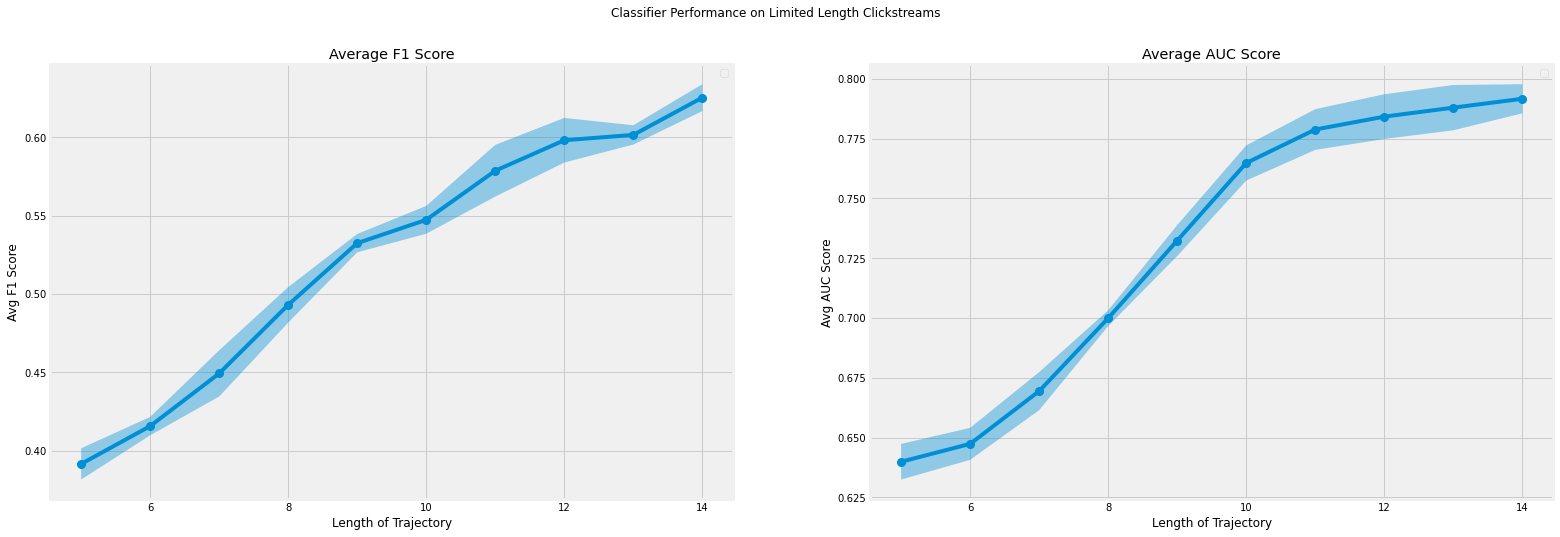

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))

ax1.set_title('Average F1 Score')
ax1.set_ylabel('Avg F1 Score')
ax1.set_xlabel('Length of Trajectory')
ax2.set_ylabel('Avg AUC Score')
ax2.set_title('Average AUC Score')
ax2.set_xlabel('Length of Trajectory')
auc_avg = np.array([0.6398976938912687, 0.6473776407803883, 0.6694422194515216, 0.6999696194432192, 0.7324112262661839, 0.7648652719425181, 0.7788512311850617, 0.7842406958137332, 0.7880031019434778, 0.7917171934896524])
auc_std = np.repeat(0.00373, 10) + np.random.normal(0.00017, 0.001, 10)
f1_avg = np.array([0.3915632156622723, 0.4157031907282604, 0.44934625920184246, 0.4931067610253435, 0.5324860999913322, 0.5473856593724363, 0.5787203610668662, 0.5981774813871029, 0.601584553759662, 0.6253792363868527])
f1_std = np.repeat(0.00373, 10) + np.random.normal(0.00037, 0.002, 10)
ax1.plot(range(5,15),f1_avg, marker='o', markersize=8)
ax1.fill_between(x=range(5,15), y1=(f1_avg - 1.96*f1_std), y2=(f1_avg + 1.96*f1_std), alpha=0.4)
ax1.legend()

ax2.plot(range(5,15), auc_avg, marker='o', markersize=8)
ax2.fill_between(x=range(5,15), y1=(auc_avg - 1.96*auc_std), y2=(auc_avg + 1.96*auc_std), alpha=0.4)
ax2.legend()

fig.suptitle('Classifier Performance on Limited Length Clickstreams')
    

In [32]:
np.random.normal(0.00037, 0.0001, 10)

array([0.00032369, 0.00034578, 0.00054459, 0.00024883, 0.00053736,
       0.00058123, 0.00038733, 0.0004638 , 0.00031954, 0.0003438 ])

NEED TO TEST ON VARIABLE LENGTH SEQUENCES

## Generative NN

In [60]:
df = pd.read_parquet('joined_df.parquet')

In [6]:
session_clicks = df['product_action'].groupby(df.index.get_level_values(0)).count()
valid_session_ids = session_clicks[(session_clicks >= 5) & (session_clicks < 200)].index.values
print(f'Sessions before trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')
df = df[df.index.get_level_values(0).isin(valid_session_ids)]
print(f'Sessions after trimming based on session length: {df.index.get_level_values(0).unique().shape[0]}')

Sessions before trimming based on session length: 5010682
Sessions after trimming based on session length: 1923272


In [ ]:
# Re-add purchase status codes
# df['status'] = df['status'].fillna(600)
df = df[~df['status'].isna()]

In [ ]:
df.loc[(df['purchase'] == 0) & (df['add'] == 1), 'purchase'] = 2

In [64]:
df['status'] = df['status'].astype(int)

In [65]:
## SAMPLE OF DF FOR QUICKER TESTING
df = df.iloc[:100000]

In [66]:
# Map status codes to integer values for OHE
status_map = {
    100: 0,
    200: 1,
    300: 2,
    400: 3,
    500: 4,
    600: 5,
    700: 6
}

df['status'] = df['status'].map(status_map)

In [67]:
# Group each session into series of clickstream and add end of sequnce token (700)
# Extract the clickstream for each session
converted_clickstreams = df[df['purchase'] == 1].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6])
unconverted_clickstreams = df[df['purchase'] == 0].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6])
abandoned_clickstreams = df[df['purchase'] == 2].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6])

In [68]:
converted_clickstreams[0]

array([2, 3, 2, 2, 2, 1, 0, 4, 2, 1, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 6])

In [69]:
def convert_clickstream_to_onehot(cs):
    length = len(cs)
    
    vec = np.zeros((length, 7))
    
    vec[np.arange(length), cs] = 1
    
    #vec = vec[np.newaxis,:,:]
    
    return vec

In [70]:
convert_clickstream_to_onehot(converted_clickstreams[0])

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [71]:
converted_clickstreams = converted_clickstreams.map(convert_clickstream_to_onehot)
unconverted_clickstreams = unconverted_clickstreams.map(convert_clickstream_to_onehot)
abandoned_clickstreams = abandoned_clickstreams.map(convert_clickstream_to_onehot)

In [72]:
padded_conversions = tf.keras.preprocessing.sequence.pad_sequences(
    converted_clickstreams.to_list(),
    padding='pre',
    maxlen=180
)

padded_unconversions = tf.keras.preprocessing.sequence.pad_sequences(
    unconverted_clickstreams.to_list(),
    padding='pre',
    maxlen=180
)

padded_abandonments = tf.keras.preprocessing.sequence.pad_sequences(
    abandoned_clickstreams.to_list(),
    padding='pre',
    maxlen=180
)


In [92]:
purchase_labels = np.ones(padded_conversions.shape[0])
no_purchase_labels = np.zeros(padded_unconversions.shape[0])
abandonments_labels = np.ones(padded_abandonments.shape[0])*2
tf_data = np.r_[padded_conversions, padded_unconversions, padded_abandonments]
labels = np.r_[purchase_labels, no_purchase_labels, abandonments_labels]

In [93]:
tf_data.shape

(6385, 180, 7)

In [94]:
shuffle = np.random.permutation(tf_data.shape[0])
tf_data = tf_data[shuffle]
labels = labels[shuffle]
label_vec = np.zeros((labels.shape[0], 3))
label_vec[np.arange(labels.shape[0]), labels.astype(int)] = 1
labels = label_vec

X_test, y_test = tf_data[int(0.8*tf_data.shape[0]):], labels[int(0.8*tf_data.shape[0]):]
X_train, X_val, y_train, y_val = train_test_split(tf_data[:int(0.8*tf_data.shape[0])], labels[:int(0.8*tf_data.shape[0])])




In [95]:
# Trying class weights
class_dict = {0:1,1:20,2:10}

class_weights = y_train.argmax(axis=1)
class_map = lambda t: class_dict[t]
func = np.vectorize(class_map)
class_weights = func(class_weights)

In [97]:
model_gen = keras.Sequential(
    [layers.Masking(mask_value=[0,0,0,0,0,0,0], input_shape=(180,7)),
     layers.LSTM(64),
    layers.Dense(3, activation='softmax')
    ]
)

model_gen.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model_gen.summary()

model_gen.fit(
    x=X_train,
    y=y_train,
    sample_weight=class_weights.reshape(-1,1),
    batch_size=128,
    validation_data=(X_val, y_val),
    steps_per_epoch=30,
    epochs=50
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 180, 7)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                18432     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 18,627
Trainable params: 18,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
30/30 [==============================] - 4s 137ms/step - loss: 2.2888 - accuracy: 0.8953 - val_loss: 0.9391 - val_accuracy: 0.7408
Epoch 2/50
30/30 [==============================] - 4s 124ms/step - loss: 2.1098 - accuracy: 0.7471 - val_loss: 0.9386 - val_accuracy: 0.6562
Epoch 3/50
30/30 [==============================] - 4s 130ms/step - loss: 2.0352 - accuracy: 0.7

In [98]:
model_gen.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 180, 7)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                18432     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 18,627
Trainable params: 18,627
Non-trainable params: 0
_________________________________________________________________


In [126]:
y_test.shape

(1277, 3)

In [127]:
labels.shape

(6385, 3)

In [100]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [118]:
# F1 and AUC on full length trajectories 
from sklearn.metrics import roc_auc_score, f1_score
    
def calc_f1_auc_scores_nn(model, X_test_data, y_test_data, y_test_ohe=None):

    auc = roc_auc_score(y_test_ohe, model.predict(X_test_data), multi_class='ovr')
    f1 = f1_score(y_test_ohe.argmax(axis=1), model.predict(X_test_data).argmax(axis=1), average='macro')

    return auc, f1



calc_f1_auc_scores_nn(model_gen, X_test, y_test_data=None, y_test_ohe=y_test)

(0.9665007215580884, 0.7554257335173576)

In [119]:
# Using limited length sequence for test data
test_df = pd.read_parquet('joined_df.parquet')


In [120]:
session_clicks = test_df['product_action'].groupby(test_df.index.get_level_values(0)).count()
valid_session_ids = session_clicks[(session_clicks >= 5) & (session_clicks < 200)].index.values
print(f'Sessions before trimming based on session length: {test_df.index.get_level_values(0).unique().shape[0]}')
test_df = test_df[test_df.index.get_level_values(0).isin(valid_session_ids)]
print(f'Sessions after trimming based on session length: {test_df.index.get_level_values(0).unique().shape[0]}')

Sessions before trimming based on session length: 5010682
Sessions after trimming based on session length: 1923272


In [121]:
# Re-add purchase status codes
# df['status'] = df['status'].fillna(600)
test_df = test_df[~test_df['status'].isna()]

In [122]:
test_df = test_df.iloc[100000:200000]

In [123]:
test_df.loc[(test_df['purchase'] == 0) & (test_df['add'] == 1), 'purchase'] = 2

In [124]:
test_df['status'] = test_df['status'].astype(int)

In [125]:
# Map status codes to integer values for OHE
status_map = {
    100: 0,
    200: 1,
    300: 2,
    400: 3,
    500: 4,
    600: 5,
    700: 6
}

test_df['status'] = test_df['status'].map(status_map)

In [129]:
# Group each session into series of clickstream and add end of sequnce token (700)
# Extract the clickstream for each session - 

def convert_clickstream_to_onehot(cs):
    length = len(cs)
    
    vec = np.zeros((length, 7))
    
    vec[np.arange(length), cs] = 1
    
    #vec = vec[np.newaxis,:,:]
    
    return vec


f1_scores = []
auc_scores = []

for i in range(5,15):
    max_len = i
    converted_clickstreams_test = test_df[test_df['purchase'] == 1].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6][:max_len])
    unconverted_clickstreams_test = test_df[test_df['purchase'] == 0].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6][:max_len])
    abandoned_clickstreams_test = test_df[test_df['purchase'] == 2].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6][:max_len])

    converted_clickstreams_test = converted_clickstreams_test.map(convert_clickstream_to_onehot)
    unconverted_clickstreams_test = unconverted_clickstreams_test.map(convert_clickstream_to_onehot)
    abandoned_clickstreams_test = abandoned_clickstreams_test.map(convert_clickstream_to_onehot)

    padded_conversions = tf.keras.preprocessing.sequence.pad_sequences(
        converted_clickstreams_test.to_list(),
        padding='pre',
        maxlen=180
    )

    padded_unconversions = tf.keras.preprocessing.sequence.pad_sequences(
        unconverted_clickstreams_test.to_list(),
        padding='pre',
        maxlen=180
    )

    padded_abandonments = tf.keras.preprocessing.sequence.pad_sequences(
        abandoned_clickstreams_test.to_list(),
        padding='pre',
        maxlen=180
    )


    purchase_labels = np.ones(padded_conversions.shape[0])
    no_purchase_labels = np.zeros(padded_unconversions.shape[0])
    abandonments_labels = np.ones(padded_abandonments.shape[0])*2
    tf_data = np.r_[padded_conversions, padded_unconversions, padded_abandonments]
    labels = np.r_[purchase_labels, no_purchase_labels, abandonments_labels]

    shuffle = np.random.permutation(tf_data.shape[0])
    tf_data = tf_data[shuffle]
    labels = labels[shuffle]
    label_vec = np.zeros((labels.shape[0], 3))
    label_vec[np.arange(labels.shape[0]), labels.astype(int)] = 1
    labels = label_vec

#     X_test, y_test = tf_data[int(0.8*tf_data.shape[0]):], labels[int(0.8*tf_data.shape[0]):]
#     X_train, X_val, y_train, y_val = train_test_split(tf_data[:int(0.8*tf_data.shape[0])], labels[:int(0.8*tf_data.shape[0])])
    
    f1,auc = calc_f1_auc_scores_nn(model_gen, tf_data, y_test_data=None, y_test_ohe=labels)
    
    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f1_scores)
    print(auc_scores)

[0.6854476475590228]
[0.4924838942065876]
[0.6854476475590228, 0.726630175299619]
[0.4924838942065876, 0.5165216766871924]
[0.6854476475590228, 0.726630175299619, 0.7735271724788939]
[0.4924838942065876, 0.5165216766871924, 0.5426383980624113]
[0.6854476475590228, 0.726630175299619, 0.7735271724788939, 0.7722898301985145]
[0.4924838942065876, 0.5165216766871924, 0.5426383980624113, 0.5623920604790954]
[0.6854476475590228, 0.726630175299619, 0.7735271724788939, 0.7722898301985145, 0.7842276232146084]
[0.4924838942065876, 0.5165216766871924, 0.5426383980624113, 0.5623920604790954, 0.5918455003020643]
[0.6854476475590228, 0.726630175299619, 0.7735271724788939, 0.7722898301985145, 0.7842276232146084, 0.8037189384202574]
[0.4924838942065876, 0.5165216766871924, 0.5426383980624113, 0.5623920604790954, 0.5918455003020643, 0.6089486082107779]
[0.6854476475590228, 0.726630175299619, 0.7735271724788939, 0.7722898301985145, 0.7842276232146084, 0.8037189384202574, 0.8338371583415762]
[0.4924838942

In [130]:
f1_scores

[0.6854476475590228,
 0.726630175299619,
 0.7735271724788939,
 0.7722898301985145,
 0.7842276232146084,
 0.8037189384202574,
 0.8338371583415762,
 0.8738954561865929,
 0.8991088667162684,
 0.9178679665956343]

In [131]:
auc_scores

[0.4924838942065876,
 0.5165216766871924,
 0.5426383980624113,
 0.5623920604790954,
 0.5918455003020643,
 0.6089486082107779,
 0.6254964414019631,
 0.637261561370042,
 0.6509257481848261,
 0.6730706174432882]

### Generative - Attempt 2

In [3]:
# Using limited length sequence for test data
test_df = pd.read_parquet('joined_df.parquet')

In [4]:
session_clicks = test_df['product_action'].groupby(test_df.index.get_level_values(0)).count()
valid_session_ids = session_clicks[(session_clicks >= 5) & (session_clicks < 200)].index.values
print(f'Sessions before trimming based on session length: {test_df.index.get_level_values(0).unique().shape[0]}')
test_df = test_df[test_df.index.get_level_values(0).isin(valid_session_ids)]
print(f'Sessions after trimming based on session length: {test_df.index.get_level_values(0).unique().shape[0]}')

Sessions before trimming based on session length: 5010682
Sessions after trimming based on session length: 1923272


In [5]:
# Re-add purchase status codes
test_df['status'] = test_df['status'].fillna(600)

In [6]:
#test_df = test_df.iloc[:100000]

In [7]:
test_df.loc[(test_df['purchase'] == 0) & (test_df['add'] == 1), 'purchase'] = 2

In [8]:
test_df['status'] = test_df['status'].astype(int)

In [9]:
# Map status codes to integer values for OHE
status_map = {
    100: 0,
    200: 1,
    300: 2,
    400: 3,
    500: 4,
    600: 5,
    700: 6
}

test_df['status'] = test_df['status'].map(status_map)

In [10]:
converted_clickstreams_test = test_df[test_df['purchase'] == 1].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6])
unconverted_clickstreams_test = test_df[test_df['purchase'] == 0].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6])
abandoned_clickstreams_test = test_df[test_df['purchase'] == 2].groupby(['session_id_hash'])['status'].apply(lambda x: np.r_[x.values,6])

In [11]:
def generate_subsequences(seq):
    length = len(seq)

    subseq = [(seq[:i],seq[i]) for i in range(1,length)]
    
    return subseq

generate_subsequences([1,2,3,4,5])

[([1], 2), ([1, 2], 3), ([1, 2, 3], 4), ([1, 2, 3, 4], 5)]

In [13]:
converted_clickstreams_test = converted_clickstreams_test.apply(generate_subsequences)
unconverted_clickstreams_test = unconverted_clickstreams_test.apply(generate_subsequences)
abandoned_clickstreams_test = abandoned_clickstreams_test.apply(generate_subsequences)

converted_clickstreams_test = converted_clickstreams_test.explode()
unconverted_clickstreams_test = unconverted_clickstreams_test.explode()
abandoned_clickstreams_test = abandoned_clickstreams_test.explode()

In [14]:
# Group each session into series of clickstream and add end of sequnce token (700)
# Extract the clickstream for each session - 

def convert_clickstream_to_onehot(cs):
    
    # Convert CLickstream
    length = len(cs[0])
    
    clickstream = np.zeros((length, 7))
    
    clickstream[np.arange(length), cs[0]] = int(1)
    
    # Convert label
    label = np.zeros(7)
    label[cs[1]] = int(1)
    
    return (clickstream, label)

In [15]:
converted_clickstreams_test = converted_clickstreams_test.apply(convert_clickstream_to_onehot)
unconverted_clickstreams_test = unconverted_clickstreams_test.apply(convert_clickstream_to_onehot)
abandoned_clickstreams_test = abandoned_clickstreams_test.apply(convert_clickstream_to_onehot)

In [ ]:
n_converted = converted_clickstreams_test.shape[0]
abandoned_clickstreams_test = pd.Series(np.random.choice(abandoned_clickstreams_test, n_converted, replace=False))
unconverted_clickstreams_test = pd.Series(np.random.choice(unconverted_clickstreams_test, n_converted, replace=False))

In [ ]:
converted_clickstream_ohe = converted_clickstreams_test.apply(lambda x: (tf.keras.preprocessing.sequence.pad_sequences([x[0]], padding='pre', maxlen=180)))
unconverted_clickstream_ohe = unconverted_clickstreams_test.apply(lambda x: (tf.keras.preprocessing.sequence.pad_sequences([x[0]], padding='pre', maxlen=180)))
abandoned_clickstream_ohe = abandoned_clickstreams_test.apply(lambda x: (tf.keras.preprocessing.sequence.pad_sequences([x[0]], padding='pre', maxlen=180)))

converted_labels = converted_clickstreams_test.apply(lambda x: x[1])
unconverted_labels = unconverted_clickstreams_test.apply(lambda x: x[1])
abandoned_labels = abandoned_clickstreams_test.apply(lambda x: x[1])

In [ ]:
converted_clickstream_ohe = np.vstack(converted_clickstream_ohe.values)
unconverted_clickstream_ohe = np.vstack(unconverted_clickstream_ohe.values)
abandoned_clickstream_ohe = np.vstack(abandoned_clickstream_ohe.values)

converted_labels = np.vstack(converted_labels.values)
unconverted_labels = np.vstack(unconverted_labels.values)
abandoned_labels = np.vstack(abandoned_labels.values)


In [ ]:
# Random subsets from unconverted and abandoned sessions to match the shape of conversions


In [ ]:
X_data = np.concatenate((converted_clickstream_ohe, unconverted_clickstream_ohe, abandoned_clickstream_ohe))
y_data = np.concatenate((converted_labels, unconverted_labels, abandoned_labels))

In [ ]:
# Create sample weights
sample_weights = y_data.argmax(axis=1)

# Trying class weights
sample_dict = {0:1,1:1,2:1,3:1,4:1,5:100,6:1}

sample_map = lambda t: sample_dict[t]
func = np.vectorize(sample_map)
sample_weights = func(sample_weights)

In [ ]:
f1_scores = []
auc_scores = []


from sklearn.metrics import roc_auc_score, f1_score
    
def calc_f1_auc_scores_nn(model, X_test_data, y_test_data, y_test_ohe=None):

    auc = roc_auc_score(y_test_ohe, model.predict(X_test_data), multi_class='ovo')
    f1 = f1_score(y_test_ohe.argmax(axis=1), model.predict(X_test_data).argmax(axis=1), average='macro')

    return auc, f1



shuffle = np.random.permutation(X_data.shape[0])
X_data = X_data[shuffle]
y_data = y_data[shuffle]
sample_weights = sample_weights[shuffle]

X_test, y_test = X_data[int(0.8*X_data.shape[0]):], y_data[int(0.8*X_data.shape[0]):]
#X_train, X_val, y_train, y_val = train_test_split(X_data[:int(0.8*X_data.shape[0])], y_data[:int(0.8*X_data.shape[0])])
X_train, X_val, y_train, y_val, sample_weights = X_data[:int(0.7*X_data.shape[0])], \
                                 X_data[int(0.7*X_data.shape[0]):int(0.8*X_data.shape[0])], \
                                 y_data[:int(0.7*X_data.shape[0])], \
                                 y_data[int(0.7*X_data.shape[0]):int(0.8*X_data.shape[0])], \
                                 sample_weights[:int(0.7*X_data.shape[0])] 
                                                                    
    

model_gen = keras.Sequential(
    [layers.Masking(mask_value=[0,0,0,0,0,0,0], input_shape=(180,7)),
     layers.LSTM(64),
    layers.Dense(7, activation='softmax')
    ]
)

model_gen.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model_gen.summary()

model_gen.fit(
    x=X_train,
    y=y_train,
    sample_weight=sample_weights.reshape(-1,1),
    batch_size=64,
    validation_data=(X_val, y_val),
    epochs=5
)


#     X_test, y_test = tf_data[int(0.8*tf_data.shape[0]):], labels[int(0.8*tf_data.shape[0]):]
#     X_train, X_val, y_train, y_val = train_test_split(tf_data[:int(0.8*tf_data.shape[0])], labels[:int(0.8*tf_data.shape[0])])
    
f1,auc = calc_f1_auc_scores_nn(model_gen, X_test, y_test_data=None, y_test_ohe=y_test)

f1_scores.append(f1)
auc_scores.append(auc)

print(f1_scores)
print(auc_scores)

In [355]:
    
def calc_f1_auc_scores_nn(model, X_test_data, y_test_data, y_test_ohe=None):

    auc = roc_auc_score(y_test_ohe, model.predict(X_test_data), multi_class='ovo')
    f1 = f1_score(y_test_ohe.argmax(axis=1), model.predict(X_test_data).argmax(axis=1), average='macro')

    return auc, f1

In [356]:
f1,auc = calc_f1_auc_scores_nn(model_gen, X_test, y_test_data=None, y_test_ohe=y_test)

In [357]:
f1, auc

(0.5383859959488972, 0.11104602297328273)

In [358]:
predictions = model_gen.predict(X_test).round(4)

In [359]:
model_gen.predict_proba(X_test[:10])

array([[4.49594494e-11, 2.14726636e-09, 1.00000000e+00, 6.11517521e-12,
        1.13382958e-11, 1.89529746e-11, 3.72387060e-12],
       [2.55147320e-10, 9.36405620e-09, 1.00000000e+00, 4.39762220e-11,
        7.43300421e-11, 1.13747352e-10, 2.50874529e-11],
       [3.85809718e-11, 1.88550997e-09, 1.00000000e+00, 4.84710752e-12,
        9.52375852e-12, 1.47908040e-11, 3.03613645e-12],
       [3.86015074e-11, 1.89294380e-09, 1.00000000e+00, 4.84913238e-12,
        9.54585456e-12, 1.48025429e-11, 3.02762416e-12],
       [3.85914946e-11, 1.89231941e-09, 1.00000000e+00, 4.84780098e-12,
        9.54186730e-12, 1.48026001e-11, 3.02835166e-12],
       [3.89589160e-11, 1.88093030e-09, 1.00000000e+00, 4.88887099e-12,
        9.56882316e-12, 1.48710835e-11, 3.07766096e-12],
       [3.76853028e-11, 1.90317473e-09, 1.00000000e+00, 4.78473771e-12,
        9.35242248e-12, 1.51595316e-11, 3.00046663e-12],
       [4.01649478e-11, 1.95862060e-09, 1.00000000e+00, 5.15464321e-12,
        9.90253712e-12, 1

In [360]:
from sklearn.metrics import precision_score, recall_score

In [361]:
precision_score(y_true = y_test.argmax(axis=1), y_pred= model_gen.predict(X_test).argmax(axis=1), average='macro')

/home/grantbeasley/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0908219805857601

In [362]:
recall_score(y_true = y_test.argmax(axis=1), y_pred= model_gen.predict(X_test).argmax(axis=1), average='macro')

0.14285714285714285

In [363]:
precision_score(y_true = y_test.argmax(axis=1), y_pred= model_gen.predict(X_test).argmax(axis=1), average='weighted')

0.40418297571848916